<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Paradigma "*Divide y vencerás*".

**Entrada:** Una secuencia de n números $[x_1,x_2,...,x_n]$

**Salida:** Permutación ordenada de la secuencia de entrada: $[x_1',x_2',...,x_n']$, de tal manera que $x_1'\leq x_2' \leq... \leq x_n'$.

![image](https://cdn.kastatic.org/ka-perseus-images/db9d172fc33b90e905c1213b8cce660c228bb99c.png)

Al momento de realizar un ordenamiento basado en recursividad, uno de los paradigmas algorítmicos más importantes a tener en cuenta es el de "*Divide y vencerás*", el cual consiste en separar un problema en varios subproblemas similares al original para así resolverlos individualmente y luego combinarlos para dar solución al problema inicial. Uno de los algoritmos que utilizan este paradigma como base para su funcionamiento es **MergeSort**, desarrollado en 1945 por John Von Neumman.

#2. MergeSort

##2.1 Código.

El siguiente código muestra una implementación del algoritmo `MergeSort`.

In [63]:
#IMPLEMENTAR VERBOSE

recCalls = 0 #Contador de llamadas recursivas de mergeSort a sí misma.
comp = 0 #Contador de comparaciones de subarreglos en merge.
def mergeSort(arr, verbose = False):
  global recCalls
  length = len(arr) #Largo de arreglo
  if length == 1:
    if verbose == True:
      print("Se retorna arreglo de una sola posición, ", arr)
    return arr
  
  if length > 1:
  
    mid = length // 2 #Posicion media del arreglo.

    recCalls+=1
    if verbose == True: print("Se divide el arreglo: ", arr[:mid], arr[mid:])
    particion_izq = mergeSort(arr[:mid], verbose)
    recCalls+=1
    particion_der = mergeSort(arr[mid:], verbose)

    arr_nuevo = merge(particion_izq, particion_der, verbose)
    return arr_nuevo

def merge(izq, der, verbose = False):
  ordenado = [] #Arreglo que contiene a los subarreglos de entrada mezclados y ordenados de menor a mayor.
  i = k = 0 
  global comp
  
  if verbose == True: 
    print("")
    print("Se procede a mezclar y ordenar subarreglos.")
  while i < len(izq) and k < len(der):
    if izq[i] < der[k]:
      ordenado.append(izq[i])
      i+=1
    else:
      ordenado.append(der[k])
      k+=1
    comp+=1
  
  if i >= len(izq) and k < len(der): #Casos de arreglos restantes.
    while(k < len(der)):
      ordenado.append(der[k])
      k+=1
      comp+=1
  else:
    while(i < len(izq)):
      ordenado.append(izq[i])
      i+=1
      comp+=1

  if verbose == True: print(ordenado)

  return ordenado

def ejecMergeSort():
  arr_desordenado = [11, 6, 1, 10, 32, 21, 50, 43, 9, 18, 20, 25, 2]
  global recCalls
  global comp
  recCalls = 0
  comp = 0
  print("Unsorted list: ", arr_desordenado)

  arr_ordenado = mergeSort(arr_desordenado)
  print("When sorted: ", arr_ordenado)
  
  print("\nRecursive calls in total: ", recCalls)
  print("Comparisons in total: ", comp)

ejecMergeSort()
  


Unsorted list:  [11, 6, 1, 10, 32, 21, 50, 43, 9, 18, 20, 25, 2]
When sorted:  [1, 2, 6, 9, 10, 11, 18, 20, 21, 25, 32, 43, 50]

Recursive calls in total:  24
Comparisons in total:  49


##2.2 Descripción del algoritmo.

El algoritmo recibe como entrada una lista (o arreglo) $arr$  con la secuencia de  $n$  elementos que se desean ordenar. 

1. Para cada llamada recursiva, `mergeSort`se encarga de dividir el arreglo de entrada por la mitad ($mid = n // 2$ ) en una partición izquierda ($[0,...,mid-1]$) y una derecha ($[mid,..., n-1]$), y luego se llama a sí misma con cada partición.

2. Si la partición resultante está compuesta de una sóla posición, entonces técnicamente está ordenada y por ende se retorna. En caso contrario, se repite el **paso 1**.

3. Finalmente y una vez que se haya conseguido la misma cantidad de subarreglos que de elementos del arreglo original ($n$), la función `merge` se encargará de unificar y ordenar los subarreglos hasta conseguir el arreglo de entrada, ordenado de menor a mayor. 

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

##2.3 Ejemplo

Tengamos en cuenta el siguiente arreglo no ordenado:

$x = [5, 3, 7, 9, 2, 4, 8, 1]$

En primer lugar, se divide el arreglo por la mitad, generando dos subarreglos.

$a = [5, 3, 7, 9] ; b = [2, 4, 8, 1] $ 

Luego, se dividen ambos subarreglos por la mitad en dos ejemplares cada uno.

$a = [5, 3] ; b = [7, 9] ; c = [2, 4] ; d= [8, 1]$

Se dividen nuevamente por la mitad para conseguir arreglos de largo 1 cada uno.

$a = [5] ; b= [3] ; c = [7]; d = [9] ; e = [2] ; f= [4]$

$g = [8] ; h = [1]$

Como todos los arreglos presentes son de largo 1, los subarreglos comienzan a reunificarse de manera ordenada.

$a = [3, 5] ; b = [7, 9] ; c = [2, 4] ; d= [1, 8]$

Este proceso se repite hasta llegar al arreglo original, pero ordenado de menor a mayor.

$a = [3, 5, 7, 9] ; b = [1, 2, 4, 8] $ 

$x = [1, 2, 3, 4, 5, 7, 8, 9] $ 

Tenemos, por último, nuestro arreglo completamente ordenado.

##2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un arreglo de tamaño $n = 5$, con elementos generados al azar en un rango del 1 al 100 cada uno.


In [55]:
import random
recCalls = 0
comp = 0
a = random.sample(range(1, 100), 5)
print("Input array: ", a)
print("")
a= mergeSort(a,verbose=True)
print("\nOutput array: ", a)
print("\nRecursive calls in total: ", recCalls)
print("Comparisons in total: ", comp)

Input array:  [5, 49, 4, 70, 61]

Se divide el arreglo:  [5, 49] [4, 70, 61]
Se divide el arreglo:  [5] [49]
Se retorna arreglo de una sola posición,  [5]
Se retorna arreglo de una sola posición,  [49]

Se procede a mezclar y ordenar subarreglos.
[5, 49]
Se divide el arreglo:  [4] [70, 61]
Se retorna arreglo de una sola posición,  [4]
Se divide el arreglo:  [70] [61]
Se retorna arreglo de una sola posición,  [70]
Se retorna arreglo de una sola posición,  [61]

Se procede a mezclar y ordenar subarreglos.
[61, 70]

Se procede a mezclar y ordenar subarreglos.
[4, 61, 70]

Se procede a mezclar y ordenar subarreglos.
[4, 5, 49, 61, 70]

Output array:  [4, 5, 49, 61, 70]

Recursive calls in total:  8
Comparisons in total:  12


#3. Tiempo de ejecución.



##3.1 Teorema

*El algoritmo InsertionSort tiene un tiempo de ejecución de $O(n log(n))$ en el peor caso*.


##3.2 Prueba de Teorema (Árbol de recursión)

Sin la necesidad de usar el teorema maestro y analizando detenidamente el código, podemos inferir que su complejidad es $O(nlog(n))$ debido a que la áltura del árbol recursivo formado al dividir el arreglo original en subarreglos en `mergeSort` es $log(n)$, y en cada nivel es necesario iterar sobre todos los elementos en `merge` para poder mezclarlos, lo cual tiene complejidad $O(n)$.

![image](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)

#4. Correctitud

##4.1 Teorema 1 (Correctitud del algoritmo Merge)

*El algoritmo Merge genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.*

#Prueba del teorema 1

Anteriormente, vimos cómo `merge` recibe dos subarreglos creados de antemano por `mergeSort` con elementos del arreglo original para reagruparlos de forma ordenada y así formar a este mismo.

Para probar que este procedimiento se lleva correctamente a cabo, probaremos la siguiente **propiedad invariante de bucle** para el `Merge`:

> *Al comienzo de cada iteracion $k$, el subarreglo $A[p,..,k-1]$ contiene los $k - p$ elementos mas pequeños de los arreglos $L[0,..,n]$ y $R[0,..,m]$ ordenados de menor a mayor. Además, $L[i]$ y $R[j]$ son los elemento más pequeños de sus respectivos arreglos que aun no se han copiado a $A$*.

**Inicialización**

Antes de la primera iteración $(k = 1)$, tenemos que $k - p = 0$, esto quiere decir que $A$ es un arreglo vacío, osea que contiene los $k - p = 0$ elementos más pequeños de $L$ y $R$ (un arreglo vacío siempre está ordenado). Por otro lado, $i = j = 0$, por lo que $L[0]$ y $R[0]$ son los elementos más pequeños que aún no han sido copiados a $A$, lo cual es trivialmente cierto. 

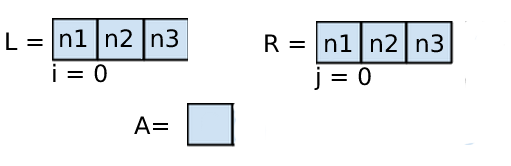

**Mantención**

Suponiendo que $L[i]$ es menor o igual a $R[j]$, entonces el primero sería el elemento más pequeño aún no copiado a $A$. Ya que $A = [p,...,k-1]$ contiene los $k - p $ menores elementros, tras copiar $L[i]$ a $A$, este arreglo ahora poseería los $k - p + 1$ elementos más pequeños ordenados de menor a mayor. (Si $R[j]$ hubiera sido menor o igual a $L[i]$, sería el elemento más pequeño aún no copiado a A).
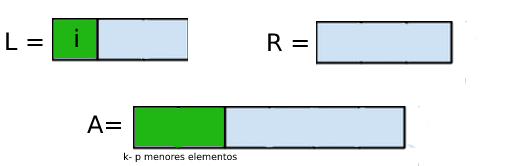

Luego incrementarían $k$ e $i$ para mantener la **propiedad invariante** y proceder a la siguiente iteración, por ende **Merge es correcto**.

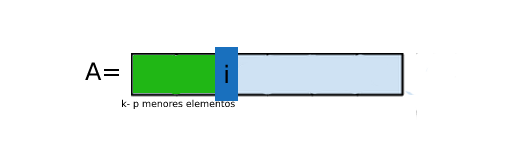

##4.2 Teorema 2 (Correctitud del algoritmo MergeSort)

*El algoritmo MergeSort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$*.

#Prueba del teorema 2

Para probar la correctitud del algoritmo `MergeSort`, se empleará la siguiente hipótesis $P(n)$.

> $MergeSort$ retorna un arreglo con la secuencia de $n$ elementos de entrada ordenados de menor a mayor. 

**Caso base $(n = 1)$**

Para este caso, al ver que nuestro arreglo original contiene solamente un elemento, técnicamente ya se encuentra ordenado de menor a mayor y el algoritmo lo retorna, esto es trivialmente cierto.

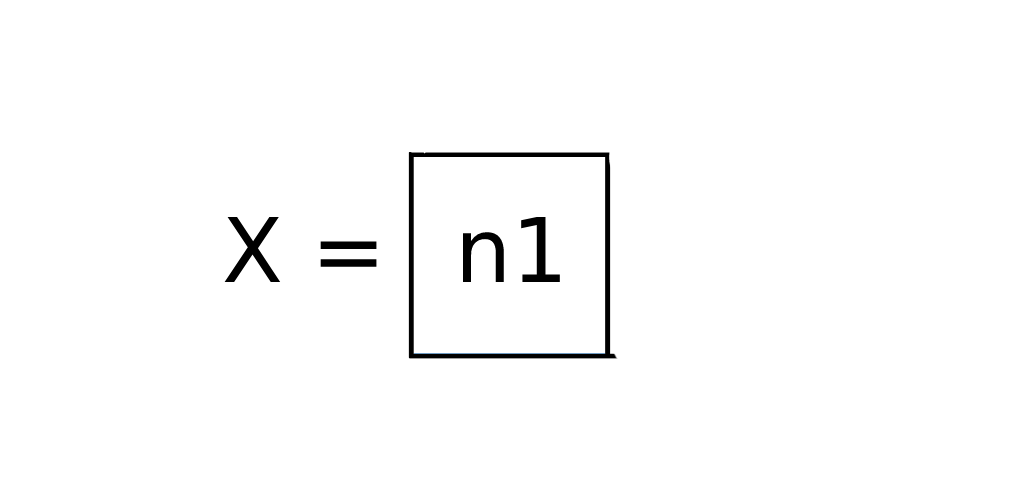
**Caso inductivo $(m < n)$**

Para un arreglo de $n$ elementos, nuestro algoritmo lo divide en dos subarreglos de tamaño $m = n/2$ y $m = n/2$ y se ordenan como `MergeSort`. Ya que el tamaño de estos subarreglos es menor a $n$, mediante inducción podemos decir que son ordenados de forma correcta.

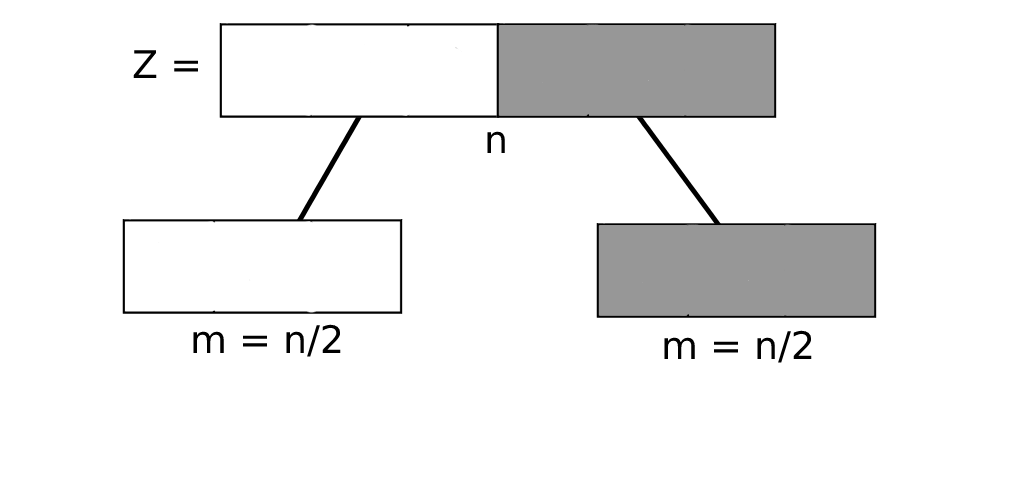

Después, los subarreglos son juntados con la función `Merge`. Como en el teorema 1 se comprobó que `Merge` es correcta, esta siempre retornará un arreglo ordenado, comprobando así que **MergeSort es correcto**.

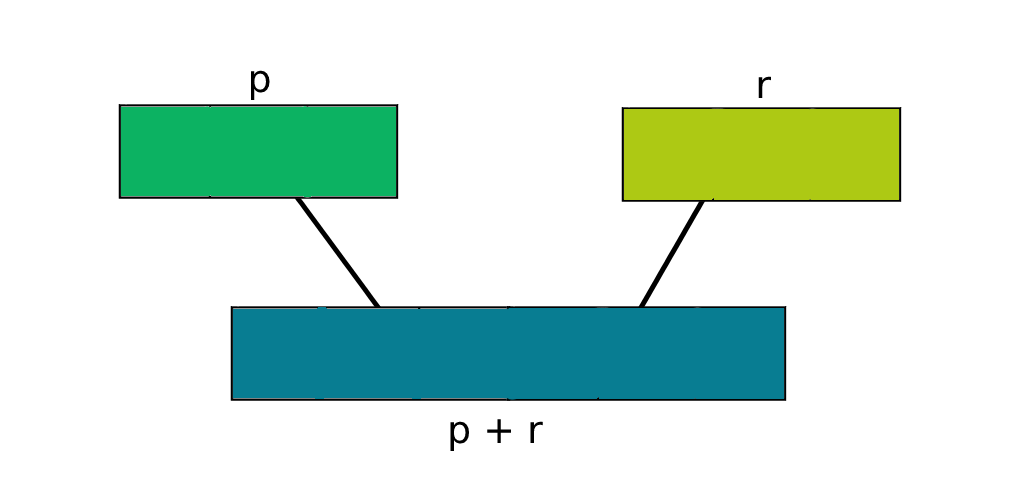

#5. Experimentos

##5.1  Número de comparaciones.

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente ($n * log_2(n)$ comparaciones),
* cantidad de comparaciones del mejor caso calculadas matemáticamente ($n * log_2(n)$ comparaciones),
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

Se tomarán en cuenta tamaños de problemas con $n \in [2,99]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

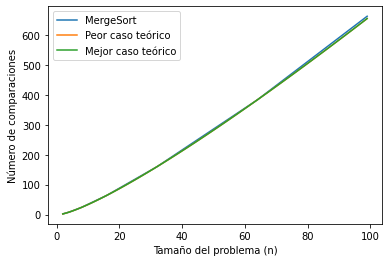

In [56]:
import matplotlib.pyplot as plt
import math
import random

x=[n for n in range(2,100)] 
y1=[(n * math.log2(n)) for n in range(2,100)] # worst case
y2=[(n * math.log2(n)) for n in range(2,100)] # best case
y=[]; 

for n in range(2,100):
  a = random.sample(range(1, 100), n)
  recCalls = 0
  comp = 0
  a = mergeSort(a)
  y.append(comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Número de comparaciones')

#Muestra de gráfico.
plt.show()

###Análisis de resultados

En el gráfico, podemos ver que el algoritmo posee un tiempo de ejecución muy estable, con los tres casos presentes creciendo a un mismo ritmo, esto es principalmente debido a que es $O(nlog(n))$ en su mejor y peor caso.

Nótese que al final del gráfico se forma una cierta diferenciación entre el caso promedio y el mejor/peor caso. Esto se debe a que el gráfico como tal se genera a partir de un programa de librería, por lo que no debería suceder en una situación real.


## 5.2 Tiempo de ejecución (experimental)

El siguiente gráfico mostrará el tiempo de ejecución del algoritmo `MergeSort` en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

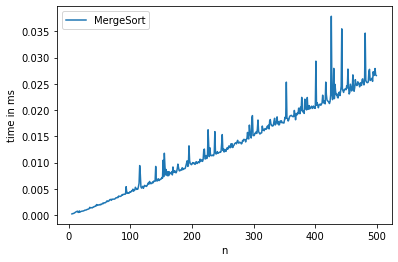

In [62]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

*Gráfica del algoritmo `InsertionSort`:

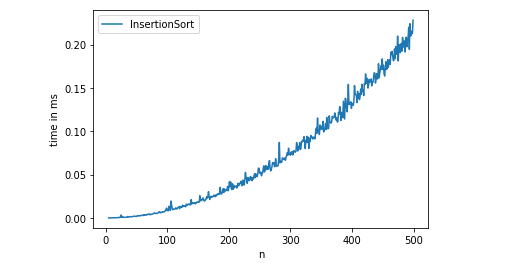

###Análisis de resultados

En el gráfico y a diferencia de lo visto en el experimiento anterior, se muestra que el tiempo de ejecución se comporta más de una manera lineal.

Cabe notar que existen peaks de tiempo. Probablemente esto se deba a la impredecibilidad de los procesadores que hacen correr el código, además de quizás otros procesos que también lo están ocupando.

Al comparar estos resultados con los de `InsertionSort`, los algoritmos poseen tiempos de ejecución muy distintos, con `InsertionSort` teniendo un comportamiento de crecimiento cuádratico respecto a $n$ y demorando más tiempo en promedio que `MergeSort`.